# Lab 3 Exercise Solutions
## TA: Suraj Yerramilli
## Date: January 28th, 2019

In [1]:
# Import libraries (run this block before anything else)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# inline plot
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 5)

# load dataset
flights = pd.read_csv("../data/flights14.csv")

## Task 1

Find the top 3 routes (origin-dest pair) with the maximum number of flights from Jan 2014-Oct 2014.

In [2]:
# create a column of origin-destination pairs
flights["routes"] = flights["origin"] + "-" + flights["dest"]
# count number of flights per pair
top_pairs = flights.routes.value_counts()
top_pairs.head(3)

JFK-LAX    10208
JFK-SFO     7368
LGA-ORD     7052
Name: routes, dtype: int64

## Task 2

For each NYC airport (JFK,LGA and EWR), do a plot of the total number of flights each day in the month of June(6).

In [3]:
airport_groups = pd.crosstab(flights.day[flights.month==6],flights.origin[flights.month==6])
airport_groups

origin,EWR,JFK,LGA
day,,,
1,276,276,283
2,314,280,324
3,291,263,303
4,309,277,316
5,331,287,321
6,339,286,327
7,254,255,193
8,308,281,272
9,328,284,316


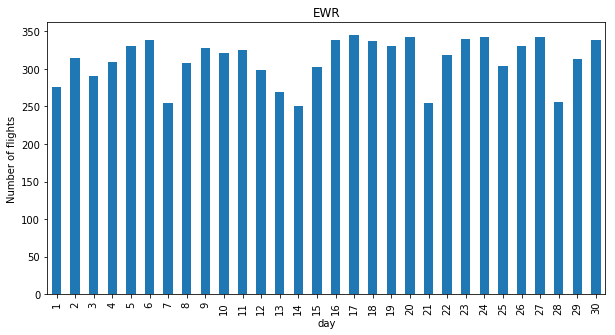

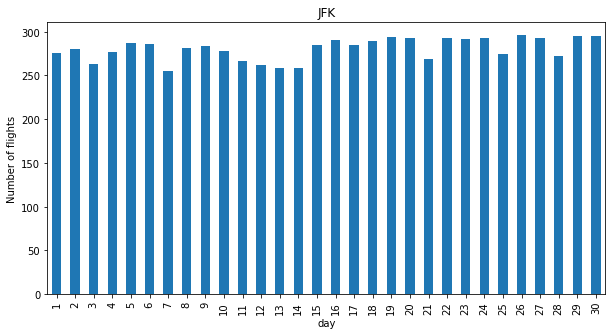

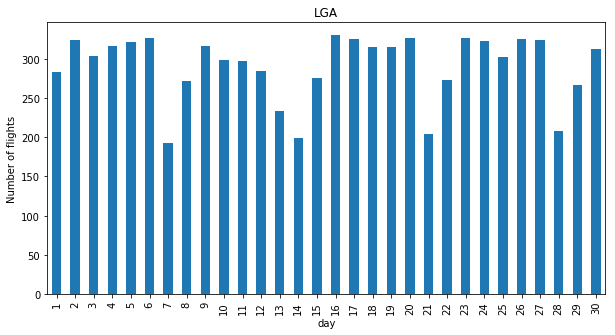

In [4]:
for column in airport_groups.columns:
    plt.figure()
    airport_groups[column].plot(kind="bar")
    plt.ylabel("Number of flights")
    plt.title(column)

## Task 3
Find the number of unique routes served by each carrier

In [5]:
# on-time flights
flights["ontime"] = flights.arr_delay <= 0

# divide dataset into groups by airline
airline_groups = flights.groupby("carrier")

In [13]:
# Number of unique routes
airline_groups.agg({'routes':pd.Series.nunique})

,routes
carrier,
AA,24
AS,1
B6,56
DL,56
EV,103
F9,2
FL,2
HA,1
MQ,32


## Task 4
- Rate the airlines (carrier) according to their on-time performance (arr_delay).
- Rate the airlines according to the total number of miles flown - do both unweighted and weighted (weighted by the total number of flights).

In [7]:
# rate by on-time performance
dat1= airline_groups.agg({'ontime':'mean','carrier':'count'}).rename(columns={'carrier':'Total'}).reset_index()
dat1.sort_values(by="ontime",ascending=False)

,carrier,ontime,Total
1,AS,0.733449,574
11,US,0.648836,16750
12,VX,0.634772,4797
3,DL,0.627498,41683
0,AA,0.601703,26302
10,UA,0.569974,46267
13,WN,0.551504,11902
2,B6,0.550912,44479
6,FL,0.545164,1251
4,EV,0.541500,39819


In [8]:
# rate by total distance (without weighting)
dat2 = airline_groups.agg({'distance':['sum','mean']})["distance"].reset_index()
dat2.sort_values(by="sum",ascending=False)

,carrier,sum,mean
10,UA,72155634,1559.548577
3,DL,52575904,1261.327256
2,B6,47554862,1069.153128
0,AA,36407712,1384.218386
4,EV,22510199,565.313016
12,VX,11980325,2497.461955
13,WN,11715150,984.300958
8,MQ,10023882,540.108950
11,US,9178227,547.953851
1,AS,1378748,2402.000000


In [9]:
# rate airlines by weighterd distance
dat2.sort_values(by="mean",ascending=False)

,carrier,sum,mean
7,HA,1295580,4983.000000
12,VX,11980325,2497.461955
1,AS,1378748,2402.000000
5,F9,759054,1604.765328
10,UA,72155634,1559.548577
0,AA,36407712,1384.218386
3,DL,52575904,1261.327256
2,B6,47554862,1069.153128
13,WN,11715150,984.300958
9,OO,143735,718.675000


## Task 5

Among flights with delayed departures (dep_delay positive), find the number of flights that have arrived early or on-time at the destination (arr_delay non-positive)? Does this "making up" have anything to do with the distance?


In [10]:
dat_delayed = flights[flights.dep_delay>0]
# ontime variable calculated in task 4
dat_delayed.ontime.mean()

0.26745718050065875

In [11]:
# ontime vs distance for flights with delayed departures
ontime_groups = dat_delayed[["ontime","distance"]].groupby("ontime")
ontime_groups.agg(['mean','std'])

distance            
               mean         std
ontime                         
False   1094.813375  742.092312
True    1318.385139  785.830771

C:\Users\surajys\AppData\Roaming\Python\Python36\site-packages\numpy\core\fromnumeric.py:56: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


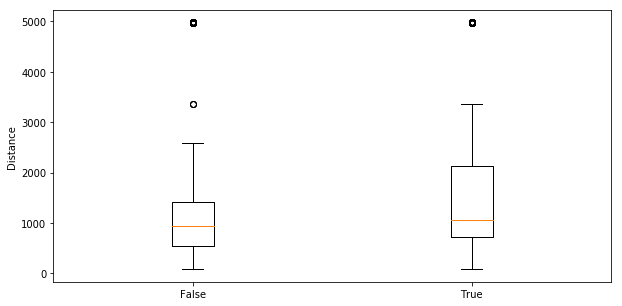

In [12]:
fig = plt.figure()
plt.boxplot([group["distance"] for _,group in ontime_groups],labels=ontime_groups.groups.keys())
plt.ylabel("Distance")
plt.show()